In [1]:
import numpy
import models
from sklearn.decomposition import PCA
import pandas
import datasets
import matplotlib.pyplot as plt
import numpy as np

In [38]:
geochemical_analysis = datasets.geochemical_analysis()

#x_labels = ["V", "CR", "CO", "NI", "CU", "ZN", "GA", "SR", "Y", "NB", "ZR", "CE", "PR", "ND", "P2O5", "MNO", "CAO", "NA2O", "SIO2", "K2O"]
#x_labels = ["RB", "K2O", "YB", "LA", "MGO", "U", "BA", "TH", "SN"]
x_labels = ["RB", "K2O", "YB", "LA", "MGO", "U", "BA", "TH", "SN", "Rb_K2O", "Rb_Yb", "Rb_La", "K2O_MgO", "Rb_MgO", "U_Ba", "Ba_La", "U_Th", "Rb_Sn", "K2O_Sn"]
#x_labels = ["Rb_K2O", "Rb_Yb", "Rb_La", "K2O_MgO", "Rb_MgO", "U_Ba", "Ba_La", "U_Th", "Rb_Sn", "K2O_Sn"]
y_labels = ["LI"]
#y_labels = []

geochemical_analysis_clean = geochemical_analysis[x_labels + y_labels].dropna()
#geochemical_analysis_clean = geochemical_analysis_clean[geochemical_analysis_clean > 0]
geochemical_analysis_clean.shape

(4133, 20)

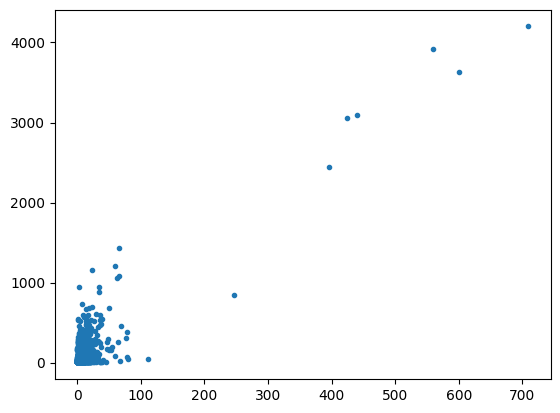

In [39]:
plt.plot(geochemical_analysis_clean["Rb_La"], geochemical_analysis_clean["LI"], ".")

In [40]:
pca = PCA()

geochemical_analysis_clean = geochemical_analysis[x_labels + y_labels].dropna()

lithium_mean = geochemical_analysis_clean["LI"].mean()
for label in x_labels + y_labels:
    geochemical_analysis_clean[label] = geochemical_analysis_clean[label]/geochemical_analysis_clean[label].mean()

pca.fit(geochemical_analysis_clean)

PCA()

In [41]:
pca.explained_variance_ratio_

array([8.43926458e-01, 8.79703437e-02, 1.89218736e-02, 1.54242919e-02,
       8.31942107e-03, 7.99465429e-03, 6.18767464e-03, 3.31058054e-03,
       1.98530281e-03, 1.64646988e-03, 1.27822715e-03, 8.44419219e-04,
       6.03613823e-04, 5.53473737e-04, 3.23443286e-04, 2.42743356e-04,
       1.99794910e-04, 1.79425999e-04, 6.24382023e-05, 2.53500197e-05])

In [44]:
pca.components_[0]

array([ 5.02291755e-04,  2.39137405e-04, -3.30658884e-04, -6.46678534e-04,
       -4.08309988e-04,  5.50913960e-01, -2.63503284e-04, -3.89597181e-04,
        1.48968156e-03,  2.71550006e-04,  1.28983503e-03,  2.94080081e-03,
        1.27299462e-03,  4.93821123e-03,  2.77136421e-01,  8.87740733e-04,
        7.87176248e-01, -6.95414616e-04, -7.57926009e-04,  1.04220272e-03])

In [43]:
x_labels

['RB',
 'K2O',
 'YB',
 'LA',
 'MGO',
 'U',
 'BA',
 'TH',
 'SN',
 'Rb_K2O',
 'Rb_Yb',
 'Rb_La',
 'K2O_MgO',
 'Rb_MgO',
 'U_Ba',
 'Ba_La',
 'U_Th',
 'Rb_Sn',
 'K2O_Sn']

In [45]:
vec_1 = pca.transform(geochemical_analysis_clean).T[0].T
vec_2 = pca.transform(geochemical_analysis_clean).T[1].T
vec_3 = pca.transform(geochemical_analysis_clean).T[2].T
vec_4 = pca.transform(geochemical_analysis_clean).T[3].T
vec_5 = pca.transform(geochemical_analysis_clean).T[4].T

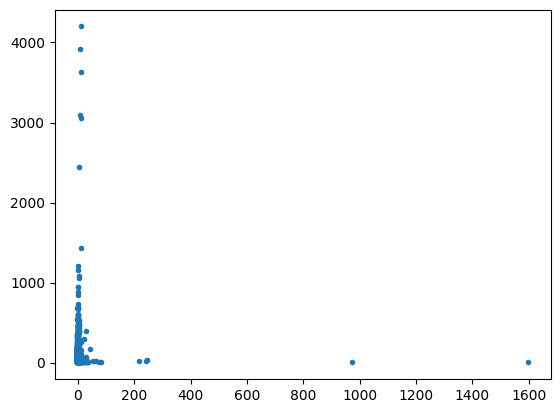

In [46]:
plt.plot(vec_1, geochemical_analysis_clean["LI"] * lithium_mean, ".")

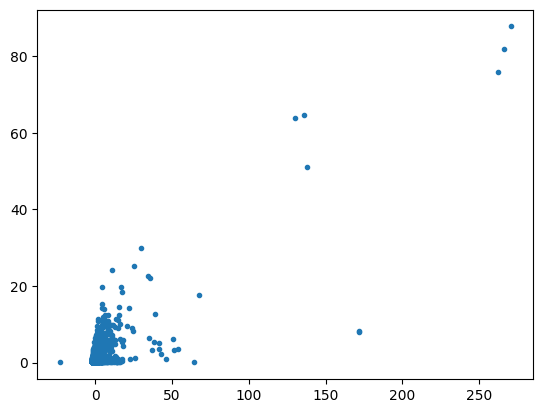

In [47]:
plt.plot(vec_2, geochemical_analysis_clean["LI"], ".")

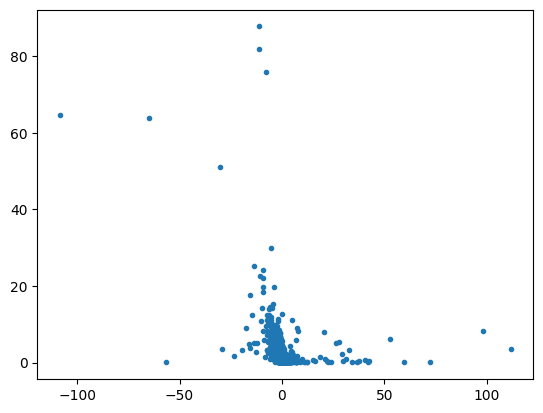

In [48]:
plt.plot(vec_3, geochemical_analysis_clean["LI"], ".")

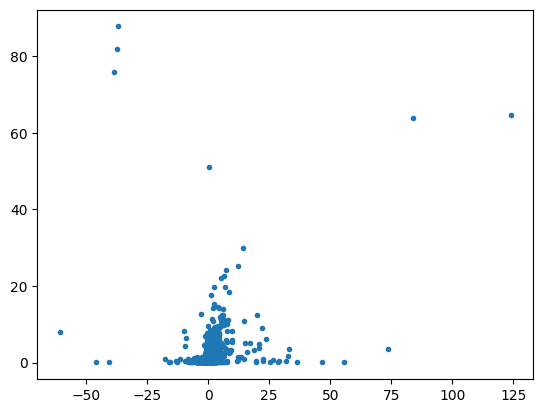

In [49]:
plt.plot(vec_4, geochemical_analysis_clean["LI"], ".")

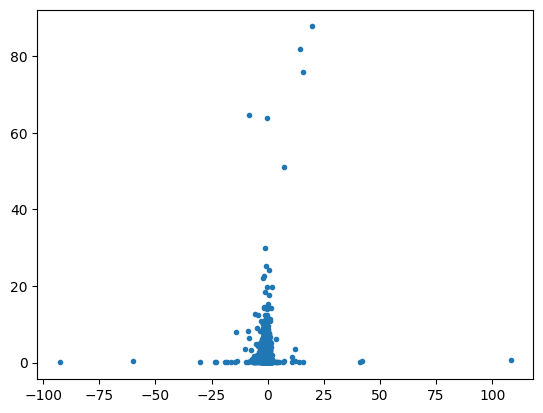

In [50]:
plt.plot(vec_5, geochemical_analysis_clean["LI"], ".")

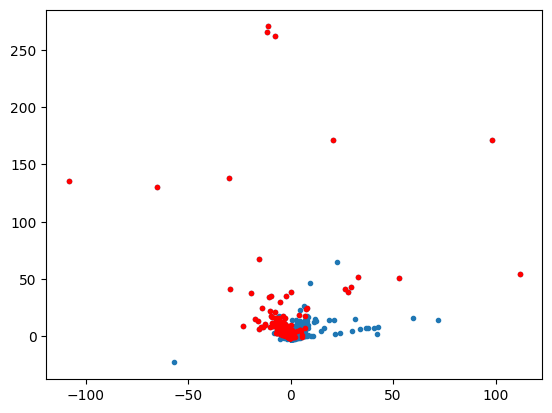

In [12]:
viable_li = (geochemical_analysis_clean["LI"] * lithium_mean) > 80

plt.plot(vec_3, vec_2, ".")
plt.plot(vec_3[viable_li], vec_2[viable_li], ".", color="r")

In [13]:
pca.components_.T[-1]

array([ 0.0010422 ,  0.2747242 , -0.24134271,  0.15427125,  0.06748674,
       -0.18742878, -0.00808072, -0.43777961, -0.36172488,  0.36882333,
       -0.42827182, -0.37788777, -0.06901014, -0.0771189 ,  0.00349944,
        0.00903003, -0.06701753,  0.04300258, -0.00471891,  0.028662  ])

In [51]:
pca.components_[1]

array([ 0.06825259,  0.0101053 , -0.00347353, -0.00317235, -0.01359897,
       -0.0249271 , -0.00581763,  0.00708653,  0.18703536,  0.04548222,
        0.20402663,  0.36128125,  0.21125625,  0.79620142,  0.16899532,
       -0.00466529, -0.04985867,  0.001779  , -0.00394901,  0.2747242 ])

In [52]:
x_labels

['RB',
 'K2O',
 'YB',
 'LA',
 'MGO',
 'U',
 'BA',
 'TH',
 'SN',
 'Rb_K2O',
 'Rb_Yb',
 'Rb_La',
 'K2O_MgO',
 'Rb_MgO',
 'U_Ba',
 'Ba_La',
 'U_Th',
 'Rb_Sn',
 'K2O_Sn']

In [16]:
print(x_labels[-6])
print(x_labels[-7])
print(x_labels[-8])
print(x_labels[-9])
print(x_labels[-11])

Rb_MgO
K2O_MgO
Rb_La
Rb_Yb
SN


In [53]:
geochemical_analysis = datasets.geochemical_analysis()

#x_labels = ["V", "CR", "CO", "NI", "CU", "ZN", "GA", "SR", "Y", "NB", "ZR", "CE", "PR", "ND", "P2O5", "MNO", "CAO", "NA2O", "SIO2", "K2O"]
x_labels = ["RB", "K2O", "YB", "LA", "MGO", "U", "BA", "TH", "SN"]
#x_labels = ["RB", "K2O", "YB", "LA", "MGO", "U", "BA", "TH", "SN", "Rb_K2O", "Rb_Yb", "Rb_La", "K2O_MgO", "Rb_MgO", "U_Ba", "Ba_La", "U_Th", "Rb_Sn", "K2O_Sn"]
#x_labels = ["Rb_K2O", "Rb_Yb", "Rb_La", "K2O_MgO", "Rb_MgO", "U_Ba", "Ba_La", "U_Th", "Rb_Sn", "K2O_Sn"]
y_labels = ["LI"]
#y_labels = []

geochemical_analysis_clean = geochemical_analysis[x_labels + y_labels].dropna()
#geochemical_analysis_clean = geochemical_analysis_clean[geochemical_analysis_clean > 0]
geochemical_analysis_clean.shape

pca = PCA()

geochemical_analysis_clean = geochemical_analysis[x_labels + y_labels].dropna()

lithium_mean = geochemical_analysis_clean["LI"].mean()
for label in x_labels + y_labels:
    geochemical_analysis_clean[label] = geochemical_analysis_clean[label]/geochemical_analysis_clean[label].mean()

pca.fit(geochemical_analysis_clean)

PCA()

In [54]:
pca.explained_variance_ratio_

array([8.99060931e-01, 6.95963009e-02, 1.81875771e-02, 5.27908698e-03,
       2.35709955e-03, 2.18625492e-03, 1.34634231e-03, 9.10160201e-04,
       8.20936508e-04, 2.55310574e-04])

In [55]:
vec_1 = pca.transform(geochemical_analysis_clean).T[0].T
vec_2 = pca.transform(geochemical_analysis_clean).T[1].T
vec_3 = pca.transform(geochemical_analysis_clean).T[2].T

In [56]:
pca.components_[2]

array([ 1.42252115e-01,  3.07951585e-02, -1.86778220e-02,  1.27891424e-02,
       -3.09097691e-02,  4.42843200e-04,  3.00139057e-03,  2.58822303e-02,
       -5.81742882e-01,  7.98901922e-01])

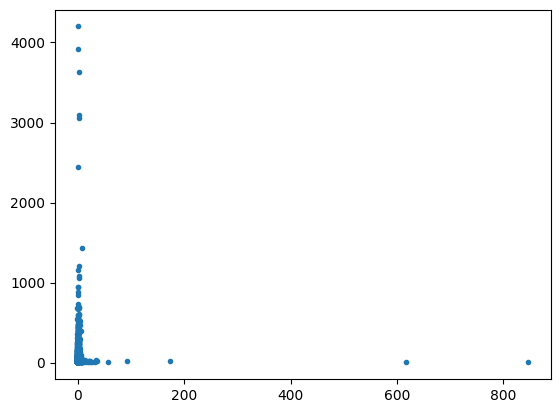

In [57]:
plt.plot(vec_1, geochemical_analysis_clean["LI"] * lithium_mean, ".")

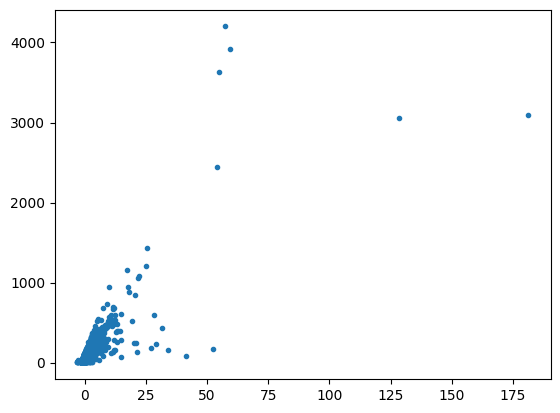

In [58]:
plt.plot(vec_2, geochemical_analysis_clean["LI"] * lithium_mean, ".")

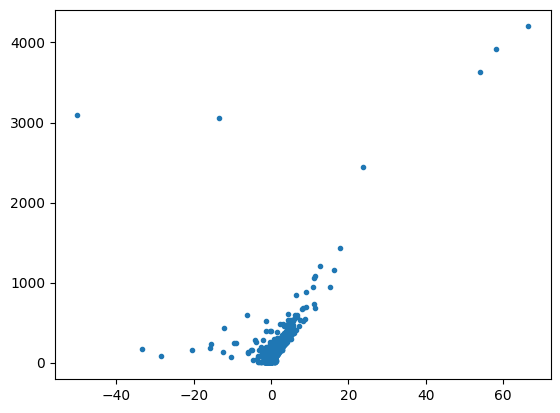

In [59]:
plt.plot(vec_3, geochemical_analysis_clean["LI"] * lithium_mean, ".")

In [60]:
pca.components_[1]

array([ 1.34294533e-01,  1.90706512e-02, -8.96315007e-03, -4.57133618e-04,
       -2.08370573e-02, -2.26407610e-03, -1.10874668e-02,  1.37083914e-02,
        8.12796050e-01,  5.65803112e-01])

In [61]:
pca.components_[2]

array([ 1.42252115e-01,  3.07951585e-02, -1.86778220e-02,  1.27891424e-02,
       -3.09097691e-02,  4.42843200e-04,  3.00139057e-03,  2.58822303e-02,
       -5.81742882e-01,  7.98901922e-01])

In [62]:
x_labels + y_labels

['RB', 'K2O', 'YB', 'LA', 'MGO', 'U', 'BA', 'TH', 'SN', 'LI']